## Importing Pandas, Numpy, And Our Classes

In [15]:
import pandas as pd
import numpy as np
from model import Model
from layer import Linear, ActivationFunc
from loss import Loss
from network import SequentialNetwork
from optimizer import Optimizer, adamOptimizer

<br>

## Top Of Our Dataset

In [16]:
df = pd.read_csv("6class.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


<br>

## Preparing Our Dataset For Training

In [17]:
inputs = np.array(df.drop(['Star type', 'Star color', 'Spectral Class'], axis=1))
truth = np.array(df['Star type'])

truth.shape = (len(truth), 1)

mean = np.mean(inputs, axis=0)
std = np.std(inputs, axis=0)

std[std == 0] = 1e-8

normalized_inputs = (inputs - mean) / std

split_index = int(len(normalized_inputs) * 0.8)

inputs = normalized_inputs[:split_index, :]
ground_truth = truth[:split_index, :]

inputs_test = normalized_inputs[split_index:, :]
ground_truth_test = truth[split_index:, :]

shuffle = np.random.permutation(len(inputs))
inputs = inputs[shuffle]
ground_truth = ground_truth[shuffle]

<br>

## Setting up the Nueral Net

In [18]:
def make_model():
    star_nn = Model()

    star_nn.addLayer(Linear(input_size = 4, output_size = 32))
    star_nn.addLayer(ActivationFunc("relu"))

    star_nn.addLayer(Linear(input_size = 32, output_size = 16))
    star_nn.addLayer(ActivationFunc("relu"))

    star_nn.addLayer(Linear(input_size = 16, output_size = 6))

    star_nn.compile(learning_rate = 1e-2) 
    return star_nn

## Testing Our Trained Data Set on The Rest of the Data

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator
from model import Model

In [20]:
temp='Temperature (K)'
L='Luminosity(L/Lo)'
r='Radius(R/Ro)'
abs_mag='Absolute magnitude(Mv)'
st='Star type'
sc='Star color'
spec='Spectral Class'

In [21]:
def vis(epoch, pred_arr):
    sns.scatterplot(data=df,x=temp,y=abs_mag,hue=pred_arr,palette='Spectral')
    sns.set(rc={'axes.facecolor':'black'})
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xscale('log')
    plt.title(f'H-R Diagram (epochs: {epoch})')
    legend = plt.legend()
    frame = legend.get_frame()
    frame.set_facecolor('white')
    plt.xticks([50000,30000, 10000,3000, 1000], ['50000','30000', '10000','3000', '1000'])
    plt.show()

In [24]:
def get_predict(model: Model, epoch):
    label_map = {
        0 : 'Brown Dwarf',
        1 : 'Red Dwarf',
        2 : 'White Dwarf',
        3 : 'Main Sequence',
        4 : 'Supergiant',
        5 : 'Hypergiant'
    }
    model.train(inputs = inputs,truth= ground_truth, epochs = epoch, batch_size = 16)
    pred = model.predict(normalized_inputs)
    shifted_pred = pred - np.max(pred, axis=-1, keepdims=True)
    final_pred = np.exp(shifted_pred - np.log(np.sum(np.exp(shifted_pred), axis=1, keepdims=True)))
    pred_arr = np.argmax(final_pred, axis=1) 
    return_arr = [label_map[x] for x in pred_arr]
    return return_arr    



Starting training:
Training completed!


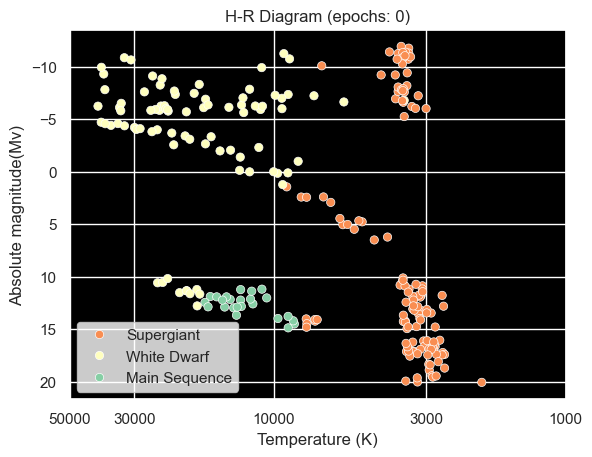

Starting training:
Epoch: 1, Loss: 23.4200
Training completed!


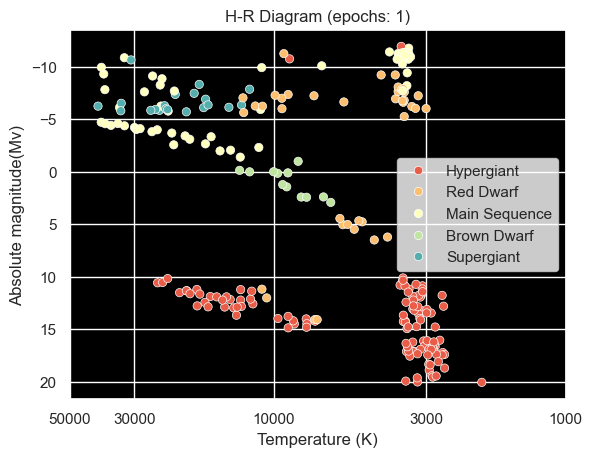

Starting training:
Epoch: 1, Loss: 5.9014
Epoch: 2, Loss: 1.0391
Epoch: 3, Loss: 0.4212
Epoch: 4, Loss: 0.2475
Epoch: 5, Loss: 0.1561
Training completed!


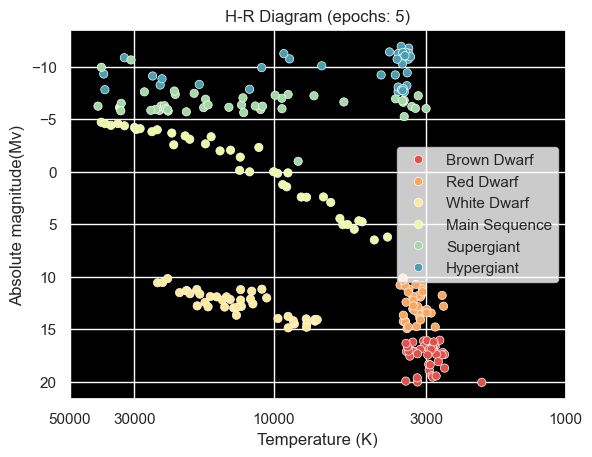

Starting training:
Epoch: 1, Loss: 9.2402
Epoch: 2, Loss: 1.2748
Epoch: 3, Loss: 0.5013
Epoch: 4, Loss: 0.3517
Epoch: 5, Loss: 0.2250
Epoch: 6, Loss: 0.1442
Epoch: 7, Loss: 0.1194
Epoch: 8, Loss: 0.1039
Epoch: 9, Loss: 0.0900
Epoch: 10, Loss: 0.0725
Training completed!


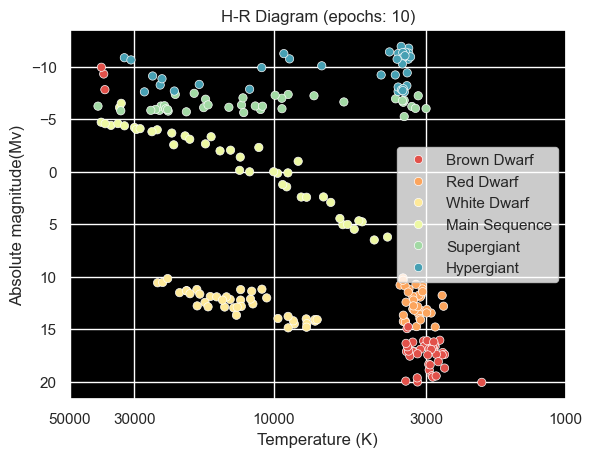

Starting training:
Epoch: 1, Loss: 7.7609
Epoch: 2, Loss: 1.4758
Epoch: 3, Loss: 0.5138
Epoch: 4, Loss: 0.2290
Epoch: 5, Loss: 0.1396
Epoch: 6, Loss: 0.1270
Epoch: 7, Loss: 0.0659
Epoch: 8, Loss: 0.0528
Epoch: 9, Loss: 0.0632
Epoch: 10, Loss: 0.0412
Epoch: 11, Loss: 0.0389
Epoch: 12, Loss: 0.0444
Epoch: 13, Loss: 0.0898
Epoch: 14, Loss: 0.1324
Epoch: 15, Loss: 0.0841
Epoch: 16, Loss: 0.0803
Epoch: 17, Loss: 0.0530
Epoch: 18, Loss: 0.0244
Epoch: 19, Loss: 0.0280
Epoch: 20, Loss: 0.0210
Epoch: 21, Loss: 0.0241
Epoch: 22, Loss: 0.0210
Epoch: 23, Loss: 0.0210
Epoch: 24, Loss: 0.0204
Epoch: 25, Loss: 0.0212
Epoch: 26, Loss: 0.0254
Epoch: 27, Loss: 0.0344
Epoch: 28, Loss: 0.0285
Epoch: 29, Loss: 0.0197
Epoch: 30, Loss: 0.0291
Epoch: 31, Loss: 0.0148
Epoch: 32, Loss: 0.0379
Epoch: 33, Loss: 0.0246
Epoch: 34, Loss: 0.0349
Epoch: 35, Loss: 0.0227
Epoch: 36, Loss: 0.0506
Epoch: 37, Loss: 0.0426
Epoch: 38, Loss: 0.0241
Epoch: 39, Loss: 0.0133
Epoch: 40, Loss: 0.0166
Epoch: 41, Loss: 0.0347
Epoch:

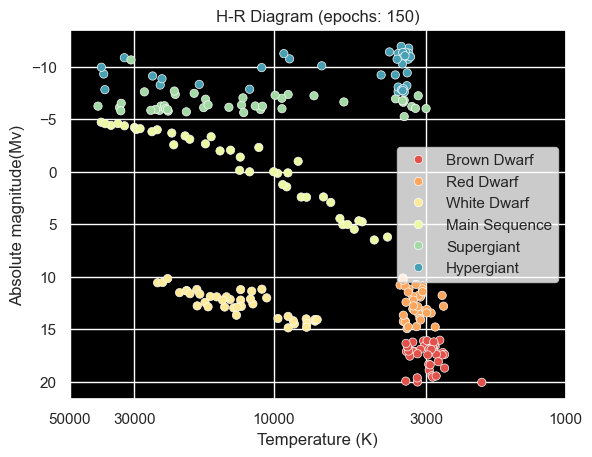

In [25]:
epochs = [0, 1, 5, 10, 150]
for e in epochs:
    model = make_model()
    vis(e, get_predict(model, e))